# $$Project Description$$ #

DATA 1030

Kaiwen Yang

## Introduction

This project aims to use machine learning methods to predict the offensive win share of a NBA player base on his shooting tendency. Win share is an advanced player stat that indicates how much a player contributes to success of his team. It is an important attribute to evaluate a player. In this project, two datasets will be used. "Seasons_Stats.csv" contains the basic stats of all NBA players from 1950 to 2017. "nba_shot_types.csv" contains data about players' shooting tendency (e.g. the ratio of a player's shots inside three point line to shots outside the three point line). The target variable would be "ows", which is the offensive win share of a player. It is a continuous variable, so regression model would be implemented. 

The topic of this project is highly related to the ongoing revolution of NBA. A lot of teams intorduced data science to game play analysis in order to improve offense and defense efficiency. They use more complex and detailed dataset to find out the most efficient offense choices, and most of the results suggest that NBA teams should encourage their players to shot more three-point and shot less mid-range jump shots. In this project, we could use simpler dataset to reproduce this analysis. 

## Dataset

In "nba_shot_types.csv", there are 3007 data points, and each has 23 features. Here are column descriptions for columns that will be using: 

"YEAR": NBA season. Category. Will be changed to discrete numerical data for the convinience of merging. 

"PLAYER": Player name. Category. 

The following data type are all float: 

"PCT_FGA_2PT": Percentage of Field Goal Attempts That Were 2 PT Shots

"PCT_FGA_3PT": Percentage of Field Goal Attempts That Were 2 PT Shots

"PCT_PTS_2PT": Percentage of Points That Came From 2 PT Field Goals Made

"PCT_PTS_MR": Percentage of Points That Came From Midrange

"PCT_PTS_3PT": Percentage of Points That Came From 3 PT Field Goals Made

"PCT_PTS_FSTBRK": Percentage of Points That Came on Fast Breaks

"PCT_PTS_FT": Percentage of Points That Came From Free Throws

"PCT_PTS_OFF_TOS": Percentage of Points That Came Off Turnovers

"PCT_PTS_INTHEPT": Percentage of Points That Came In the Paint

In "Seasons_stats_complete.csv", there are 26.1k of data points and each has 50 features. Only data between 2013-2019 will be used. Here are column descriptions for columns that will be using:

"Year": NBA season. Category. Will be changed to discrete numerical data for the convinience of merging. 

"Player": Player name. Category. 

"Pos": Position. Category. 

"OWS": offensive win share. Continuous numerical.

"2PA": 2-point attempt. Discrete numerical.

"3PA": 3-point attempt. Discrete numerical.

"FTA": free throw attempt. Discrete numerical.

## Preprocessing of Datasets

Two tables will be merged base on the "Year" and "Player" columns. After merging, these two columns will be droped.

one-hot encoder will be applied to: "Pos". The 5 different position are not ordinal. They just stand for the position of the player plays in that season. 

MinMaxEncoder will be applied to columns "2PA", "3PA", "FTA" and columns start with "PCT_". "PCT_" columns are bounded by 0 and 100. "2PA", "3PA", and "FTA" are bounded because players can only attempt shots in a limited amount of time, so the shot attempts are bounded. 

In [50]:
import numpy as np
import pandas as pd
shot = pd.read_csv('/home/jovyan/1030/project/data1030-project/data/nba_shot_types.csv')
stat = pd.read_csv('/home/jovyan/1030/project/data1030-project/data/Seasons_stats_complete.csv')

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

ohenc = OneHotEncoder(sparse=False)
mmscaler = MinMaxScaler()
sscaler = StandardScaler()

In [51]:
stat1 = stat[stat['Year'] > 2013]
stat.head(5)

shot.head(5)

stat1['Year'] = stat1['Year'].replace(2019, '2018-2019')
stat1['Year'] = stat1['Year'].replace(2018, '2017-2018')
stat1['Year'] = stat1['Year'].replace(2017, '2016-2017')
stat1['Year'] = stat1['Year'].replace(2016, '2015-2016')
stat1['Year'] = stat1['Year'].replace(2015, '2014-2015')
stat1['Year'] = stat1['Year'].replace(2014, '2013-2014')
stat1 = stat1[stat1['Tm'] != 'TOT'] # Some player were traded during the season. Remove the total stat. 

merged = stat1.merge(shot, left_on='Player', right_on='PLAYER', how='right')
merged1 = merged[merged['Year'] == merged['YEAR']]
merged1 = merged1.reset_index()
merged2 = merged1.copy()

mm_columns = ['Age', 'G','MP', 'PER', 'ORB%', "DRB%", 'OWS',
              'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OBPM', 'DBPM',
              'BPM', 'VORP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA',
              'ORB', 'TRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
              'W', 'L', "PCT_FGA_2PT", "PCT_FGA_3PT", "PCT_PTS_2PT", 
              "PCT_PTS_MR", "PCT_PTS_3PT", "PCT_PTS_FSTBRK", "PCT_PTS_FT", 
              "PCT_PTS_OFF_TOS", "PCT_PTS_INTHEPT", 'PCT_2PTGFM_ASSTD',
              'PCT_2PTGFM_UNASSTD', 'PCT_3PTGFM_ASSTD', 'PCT_3PTGFM_UNASSTD',
              'PCT_FGM_ASSTD','PCT_FGM_UNASSTD', 'DWS', 'WS']

for name in mm_columns:
    merged1[name] = sscaler.fit_transform(pd.DataFrame(merged1[name]))
    
# enc1 = OrdinalEncoder(categories = [['2013-2014','2014-2015','2015-2016','2016-2017',
#                                      '2017-2018','2018-2019']])
# year = merged1[['YEAR']]
# year = enc1.fit_transform(year)
# year = pd.DataFrame(year)
# merged1['YEAR'] = year

oh_columns = ['TEAM', 'Pos', 'YEAR']

one_hot_var = ohenc.fit_transform(pd.DataFrame(merged1[oh_columns]))
one_hot_var_name = ohenc.get_feature_names(oh_columns)
one_hot_var = pd.DataFrame(one_hot_var, columns = [one_hot_var_name])

df = merged1[['USG%', 'YEAR', 'WS', 'DWS', 'OWS', 'WS/48', 'Age', 'G','MP', 'PER', 
              'TS%', 'eFG%', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 
              'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA',
              'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
              'W', 'L', "PCT_FGA_2PT", "PCT_PTS_2PT", "PCT_FGA_3PT", 
              "PCT_PTS_3PT", "PCT_PTS_MR", "PCT_PTS_FSTBRK", "PCT_PTS_FT", 
              "PCT_PTS_OFF_TOS", "PCT_PTS_INTHEPT", 'PCT_2PTGFM_ASSTD',
              'PCT_2PTGFM_UNASSTD', 'PCT_3PTGFM_ASSTD', 'PCT_3PTGFM_UNASSTD',
              'PCT_FGM_ASSTD','PCT_FGM_UNASSTD']]

#columns_dropped = ['TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'ORB%', "DRB%"]

df1 = pd.concat([df, one_hot_var], axis=1)
#df1.to_csv('/home/jovyan/1030/project/data1030-project/data/NBA_preprocessed_2.csv', index=False)
df1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas

,USG%,YEAR,WS,DWS,OWS,WS/48,Age,G,MP,PER,...,"(Pos_PF,)","(Pos_PG,)","(Pos_SF,)","(Pos_SG,)","(YEAR_2013-2014,)","(YEAR_2014-2015,)","(YEAR_2015-2016,)","(YEAR_2016-2017,)","(YEAR_2017-2018,)","(YEAR_2018-2019,)"
0,0.192469,2018-2019,0.093897,0.070423,0.176796,-0.022,0.391304,0.111111,0.039052,0.254131,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.301255,2017-2018,0.145540,0.225352,0.176796,0.036,0.347826,0.851852,0.434699,0.284330,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.418410,2016-2017,0.093897,0.070423,0.171271,-0.133,0.304348,0.061728,0.015045,0.229630,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.345188,2016-2017,0.150235,0.140845,0.215470,0.102,0.304348,0.382716,0.162932,0.312251,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.274059,2015-2016,0.215962,0.169014,0.281768,0.137,0.260870,0.716049,0.280090,0.321368,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.324268,2014-2015,0.178404,0.169014,0.237569,0.063,0.217391,0.827160,0.411652,0.305413,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,0.303347,2013-2014,0.107981,0.084507,0.187845,0.188,0.173913,0.074074,0.019206,0.335613,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7,0.205021,2013-2014,0.159624,0.169014,0.209945,0.078,0.173913,0.679012,0.251280,0.292308,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.343096,2018-2019,0.525822,0.633803,0.464088,0.163,0.260870,0.975309,0.854033,0.343020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.349372,2017-2018,0.553991,0.492958,0.552486,0.187,0.217391,0.925926,0.795775,0.354986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [54]:
"""EDA"""
import matplotlib
from matplotlib import pylab as plt
import seaborn as sns
df = merged2
df2 = stat
print(df.shape)

usg = df['USG%']
print(df['USG%'].describe())
print()
top_50 = df[df['MP'] >= 0.75]
print(top_50['USG%'].describe())
print()
print(stat1.loc[np.argmin(stat1['USG%'])]['Player'])
print(stat1.loc[np.argmax(stat1['USG%'])]['Year'])
print()
print(df[df['Player']=='Ricky Rubio']['USG%'])
print()
print(df[df['Player']=='Paul George']['USG%'])
df2.shape

(3199, 74)
count    3199.000000
mean       18.623914
std         5.739780
min         0.000000
25%        14.800000
50%        18.000000
75%        22.000000
max        47.800000
Name: USG%, dtype: float64

count    3199.000000
mean       18.623914
std         5.739780
min         0.000000
25%        14.800000
50%        18.000000
75%        22.000000
max        47.800000
Name: USG%, dtype: float64

Lou Amundson
2013-2014

1706    22.7
1707    22.9
1708    17.4
1709    17.7
1710    20.0
1711    16.4
Name: USG%, dtype: float64

768    29.5
769    25.7
770    28.9
771    30.4
772    32.8
773    28.3
Name: USG%, dtype: float64


(26063, 50)

In [102]:
df.head(5)

,index,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,...,PCT_PTS_FSTBRK,PCT_PTS_FT,PCT_PTS_OFF_TOS,PCT_PTS_INTHEPT,PCT_2PTGFM_ASSTD,PCT_2PTGFM_UNASSTD,PCT_3PTGFM_ASSTD,PCT_3PTGFM_UNASSTD,PCT_FGM_ASSTD,PCT_FGM_UNASSTD
0,9,1.0,2018-2019,Quincy Acy,PF,28.0,PHO,10.0,123.0,2.9,...,0.0,41.2,0.0,23.5,100.0,0.0,100.0,0.0,100.0,0.0
1,18,1.0,2017-2018,Quincy Acy,PF,27.0,BRK,70.0,1359.0,8.2,...,5.1,11.9,14.4,10.2,85.7,14.3,99.0,1.0,96.2,3.8
2,25,24097.0,2016-2017,Quincy Acy,PF,26.0,TOT,38.0,558.0,11.8,...,2.7,20.3,17.1,24.3,72.7,27.3,97.3,2.7,85.7,14.3
3,26,24098.0,2016-2017,Quincy Acy,PF,26.0,DAL,6.0,48.0,-1.4,...,2.7,20.3,17.1,24.3,72.7,27.3,97.3,2.7,85.7,14.3
4,27,24099.0,2016-2017,Quincy Acy,PF,26.0,BRK,32.0,510.0,13.1,...,2.7,20.3,17.1,24.3,72.7,27.3,97.3,2.7,85.7,14.3


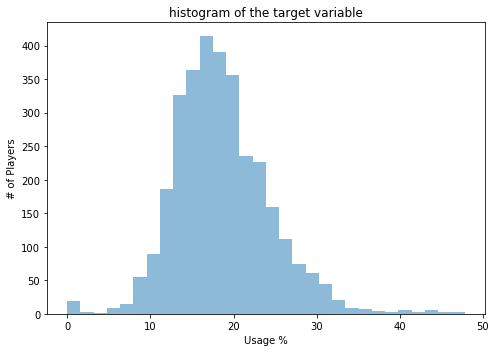


Mean of Usage Rate:  18.62391372303845


count    3199.000000
mean       18.623914
std         5.739780
min         0.000000
25%        14.800000
50%        18.000000
75%        22.000000
max        47.800000
Name: USG%, dtype: float64

In [49]:
plt.figure(figsize=(7,5))
plt.hist(df['USG%'],bins=30, alpha=0.5)

plt.xlabel('Usage %')
plt.ylabel('# of Players')
plt.title('histogram of the target variable')
plt.tight_layout()

#plt.savefig('/home/jovyan/1030/project/data1030-project/figures/target_v.png',dpi=400)
plt.show()
print()
print("Mean of Usage Rate: ", df['USG%'].mean())
df['USG%'].describe()

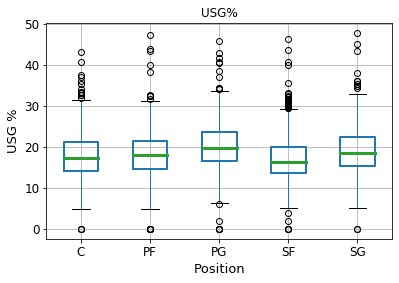

In [6]:
df[["USG%",'Pos']].boxplot(by='Pos', fontsize=12, boxprops={'linewidth':2}, medianprops={'linewidth':3})

plt.ylabel('USG %', fontdict={'size':13})
plt.xlabel('Position',fontdict={'size':13})
plt.suptitle('')
#plt.savefig('/home/jovyan/1030/project/data1030-project/figures/usg_vs_pos_boxplot.png',dpi=300)
plt.show()

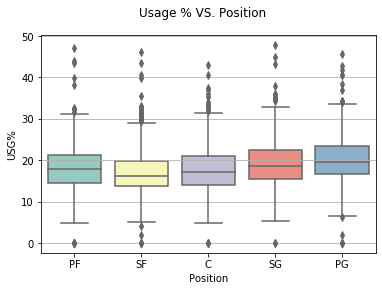

In [45]:
fig, ax = plt.subplots()
f = sns.boxplot(x='Pos', y='USG%', data=df, palette='Set3', ax=ax)
ax.yaxis.grid(True)
ax.xaxis.grid(False)
fig = f.get_figure()
plt.suptitle('Usage % VS. Position')
plt.xlabel('Position')
fig.savefig('/home/jovyan/1030/project/data1030-project/figures/usg_vs_pos_boxplot2.png', dpi=400)
plt.show()

In [35]:
# dataset = [df[df['Pos']=='PG']['USG%'].values,
#             df[df['Pos']=='SG']['USG%'].values,
#             df[df['Pos']=='SF']['USG%'].values,
#             df[df['Pos']=='PF']['USG%'].values,
#             df[df['Pos']=='C']['USG%'].values]
# plt.violinplot(dataset = dataset)
# plt.xticks([1, 2, 3, 4, 5], ['PG','SG', 'SF', 'PF', 'C'])
# plt.ylabel('label')
# plt.ylabel('hours per week')
# plt.show()

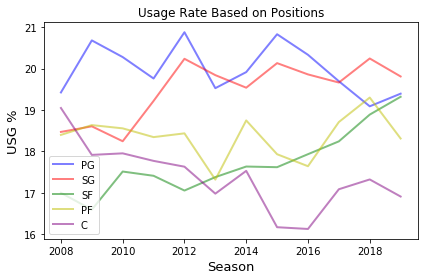

In [13]:
df2 = df2[df2['Year'] >= 2008]
x = np.flip(df2['Year'].unique())
y_pg = []
y_sg = []
y_sf = []
y_pf = []
y_c = []


df1 = df2[df2['Pos'] == 'PG']
y_pg.append(df1[df1['Year'] == 2019]['USG%'].mean())
y_pg.append(df1[df1['Year'] == 2018]['USG%'].mean())
y_pg.append(df1[df1['Year'] == 2017]['USG%'].mean())
y_pg.append(df1[df1['Year'] == 2016]['USG%'].mean())
y_pg.append(df1[df1['Year'] == 2015]['USG%'].mean())
y_pg.append(df1[df1['Year'] == 2014]['USG%'].mean())
y_pg.append(df1[df1['Year'] == 2013]['USG%'].mean())
y_pg.append(df1[df1['Year'] == 2012]['USG%'].mean())
y_pg.append(df1[df1['Year'] == 2011]['USG%'].mean())
y_pg.append(df1[df1['Year'] == 2010]['USG%'].mean())
y_pg.append(df1[df1['Year'] == 2009]['USG%'].mean())
y_pg.append(df1[df1['Year'] == 2008]['USG%'].mean())


df1 = df2[df2['Pos'] == 'SG']
y_sg.append(df1[df1['Year'] == 2019]['USG%'].mean())
y_sg.append(df1[df1['Year'] == 2018]['USG%'].mean())
y_sg.append(df1[df1['Year'] == 2017]['USG%'].mean())
y_sg.append(df1[df1['Year'] == 2016]['USG%'].mean())
y_sg.append(df1[df1['Year'] == 2015]['USG%'].mean())
y_sg.append(df1[df1['Year'] == 2014]['USG%'].mean())
y_sg.append(df1[df1['Year'] == 2013]['USG%'].mean())
y_sg.append(df1[df1['Year'] == 2012]['USG%'].mean())
y_sg.append(df1[df1['Year'] == 2011]['USG%'].mean())
y_sg.append(df1[df1['Year'] == 2010]['USG%'].mean())
y_sg.append(df1[df1['Year'] == 2009]['USG%'].mean())
y_sg.append(df1[df1['Year'] == 2008]['USG%'].mean())

df1 = df2[df2['Pos'] == 'SF']
y_sf.append(df1[df1['Year'] == 2019]['USG%'].mean())
y_sf.append(df1[df1['Year'] == 2018]['USG%'].mean())
y_sf.append(df1[df1['Year'] == 2017]['USG%'].mean())
y_sf.append(df1[df1['Year'] == 2016]['USG%'].mean())
y_sf.append(df1[df1['Year'] == 2015]['USG%'].mean())
y_sf.append(df1[df1['Year'] == 2014]['USG%'].mean())
y_sf.append(df1[df1['Year'] == 2013]['USG%'].mean())
y_sf.append(df1[df1['Year'] == 2012]['USG%'].mean())
y_sf.append(df1[df1['Year'] == 2011]['USG%'].mean())
y_sf.append(df1[df1['Year'] == 2010]['USG%'].mean())
y_sf.append(df1[df1['Year'] == 2009]['USG%'].mean())
y_sf.append(df1[df1['Year'] == 2008]['USG%'].mean())

df1 = df2[df2['Pos'] == 'PF']
y_pf.append(df1[df1['Year'] == 2019]['USG%'].mean())
y_pf.append(df1[df1['Year'] == 2018]['USG%'].mean())
y_pf.append(df1[df1['Year'] == 2017]['USG%'].mean())
y_pf.append(df1[df1['Year'] == 2016]['USG%'].mean())
y_pf.append(df1[df1['Year'] == 2015]['USG%'].mean())
y_pf.append(df1[df1['Year'] == 2014]['USG%'].mean())
y_pf.append(df1[df1['Year'] == 2013]['USG%'].mean())
y_pf.append(df1[df1['Year'] == 2012]['USG%'].mean())
y_pf.append(df1[df1['Year'] == 2011]['USG%'].mean())
y_pf.append(df1[df1['Year'] == 2010]['USG%'].mean())
y_pf.append(df1[df1['Year'] == 2009]['USG%'].mean())
y_pf.append(df1[df1['Year'] == 2008]['USG%'].mean())

df1 = df2[df2['Pos'] == 'C']
y_c.append(df1[df1['Year'] == 2019]['USG%'].mean())
y_c.append(df1[df1['Year'] == 2018]['USG%'].mean())
y_c.append(df1[df1['Year'] == 2017]['USG%'].mean())
y_c.append(df1[df1['Year'] == 2016]['USG%'].mean())
y_c.append(df1[df1['Year'] == 2015]['USG%'].mean())
y_c.append(df1[df1['Year'] == 2014]['USG%'].mean())
y_c.append(df1[df1['Year'] == 2013]['USG%'].mean())
y_c.append(df1[df1['Year'] == 2012]['USG%'].mean())
y_c.append(df1[df1['Year'] == 2011]['USG%'].mean())
y_c.append(df1[df1['Year'] == 2010]['USG%'].mean())
y_c.append(df1[df1['Year'] == 2009]['USG%'].mean())
y_c.append(df1[df1['Year'] == 2008]['USG%'].mean())

y_pg.reverse()
y_sg.reverse()
y_sf.reverse()
y_pf.reverse()
y_c.reverse()

#plt.figure(figsize=(,4)) #创建绘图对象
plt.plot(x,y_pg,"b",linewidth=2, label='PG', alpha=0.5)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.plot(x,y_sg,'r',linewidth=2, label='SG', alpha=0.5)
plt.plot(x,y_sf,'g', linewidth=2, label='SF', alpha=0.5)
plt.plot(x,y_pf,'y', linewidth=2, label='PF', alpha=0.5)
plt.plot(x,y_c, 'purple', linewidth=2, label='C', alpha=0.5)
plt.xlabel("Season",fontdict={'size':13}) #X轴标签
plt.ylabel("USG %", fontdict={'size':13})  #Y轴标签
plt.title("Usage Rate Based on Positions") #图标题
plt.tight_layout()
plt.legend(loc='lower left')
#plt.savefig('/home/jovyan/1030/project/data1030-project/figures/pts_spread_boxplot.png',dpi=300)

plt.show()  #显示图

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


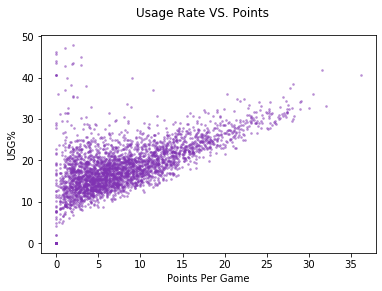

In [46]:
df['PTS_PER_G'] = df['PTS']/df['G']
df.plot.scatter('PTS_PER_G','USG%', alpha = 0.4, s=3, c=(0.5, 0.2, 0.7))# the color and size of each point can also be defined
plt.suptitle('Usage Rate VS. Points')
plt.xlabel('Points Per Game')
#plt.savefig('/home/jovyan/1030/project/data1030-project/figures/usg_vs_pts_scatter.png',dpi=300)
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


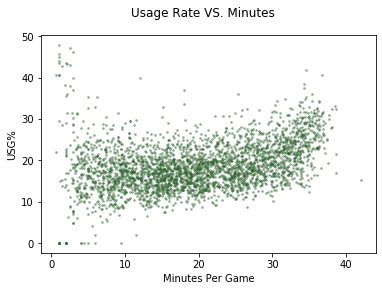

In [47]:
df['MP_PER_G'] = df['MP']/df['G']

df.plot.scatter('MP_PER_G','USG%', alpha=0.4, s=3, c=(0.2, 0.4, 0.2))# the color and size of each point can also be defined
plt.suptitle('Usage Rate VS. Minutes')
plt.xlabel('Minutes Per Game')
#plt.savefig('/home/jovyan/1030/project/data1030-project/figures/usg_vs_min_scatter.png',dpi=300)
plt.show()
#df['MP_PER_G']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


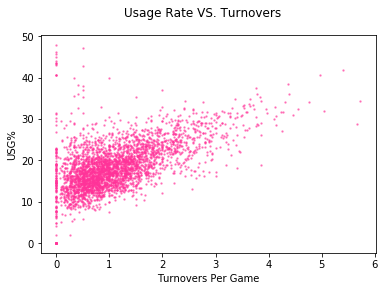

In [48]:
df['TOV_PER_G'] = df['TOV']/df['G']
df.plot.scatter('TOV_PER_G','USG%', s=2, alpha=0.5, c=(1, 0.2, 0.6))# the color and size of each point can also be defined
plt.suptitle('Usage Rate VS. Turnovers')
plt.xlabel('Turnovers Per Game')
#plt.savefig('/home/jovyan/1030/project/data1030-project/figures/usg_vs_tov_scatter.png',dpi=300)
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


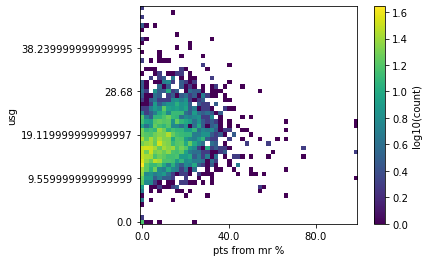

In [16]:
heatmap, xedges, yedges = np.histogram2d(df['PCT_PTS_MR'], df['USG%'], bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(np.log10(heatmap.T), origin='lower')
plt.xlabel('pts from mr %')
plt.ylabel('usg')
plt.xticks(np.arange(50)[::20], xedges[::20])
plt.yticks(np.arange(50)[::10], yedges[::10])
plt.colorbar(label='log10(count)')
#plt.savefig('/home/jovyan/1030/project/data1030-project/figures/usg_vs_mr_heatmap.png',dpi=300)
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


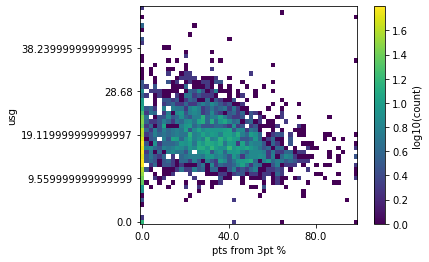

In [15]:
heatmap, xedges, yedges = np.histogram2d(df['PCT_PTS_3PT'], df['USG%'], bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.imshow(np.log10(heatmap.T), origin='lower')
plt.xlabel('pts from 3pt %')
plt.ylabel('usg')
plt.xticks(np.arange(50)[::20],xedges[::20])
plt.yticks(np.arange(50)[::10],yedges[::10])
plt.colorbar(label='log10(count)')
#plt.savefig('/home/jovyan/1030/project/data1030-project/figures/usg_vs_3pt_heatmap.png',dpi=300)
plt.show()

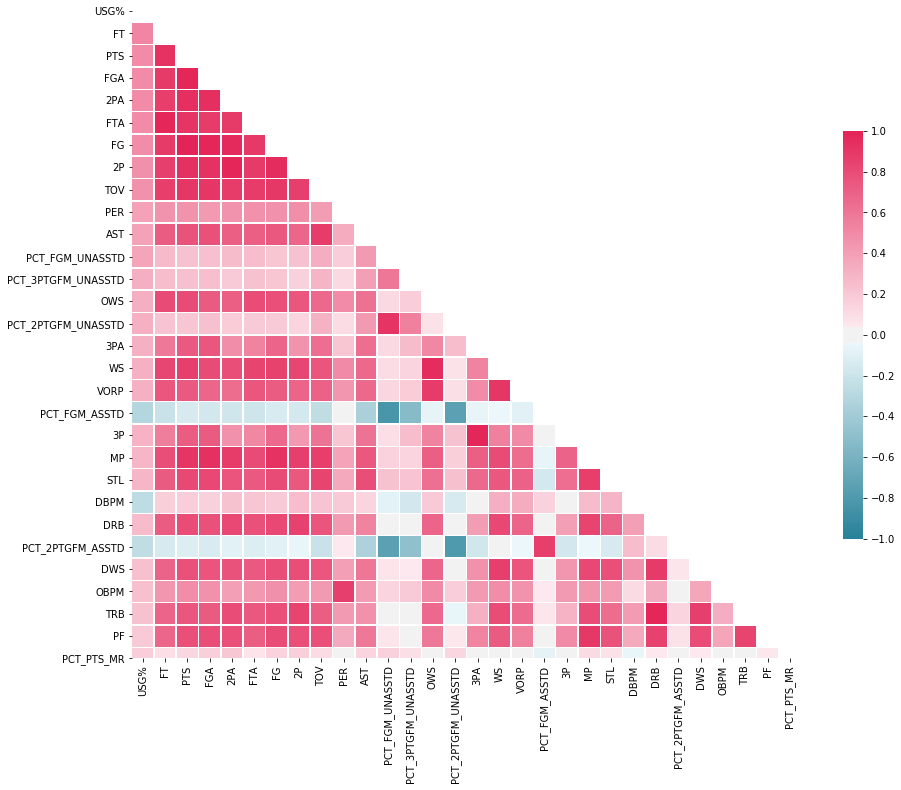

In [40]:
# Correlation Matrix
corrmat = df1.corr()

# use the absolute value of the correlation matrix for sorting!
all_cols = np.abs(corrmat).sort_values('USG%',ascending=False)['USG%'].index 
cols = all_cols[:30] # positively correlated features

cm = corrmat.loc[cols,cols]

# Generate a mask for the upper triangle
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 4, 90, as_cmap=True)

plt.figure(figsize=(15,15))
heat = sns.heatmap(cm, mask=mask, cmap=cmap, center=0, vmin=-1, vmax=1, square=True, 
                   linewidths=.5, cbar_kws={'ticks': [-1.0, -0.8, -0.6, -0.4, -0.2, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0], 'shrink':0.5})
#sns.set(font_scale=1.3)

fig = heat.get_figure()
#fig.savefig('/home/jovyan/1030/project/data1030-project/figures/abs_corr_coeff.png', dpi=400, bbox_inches='tight')

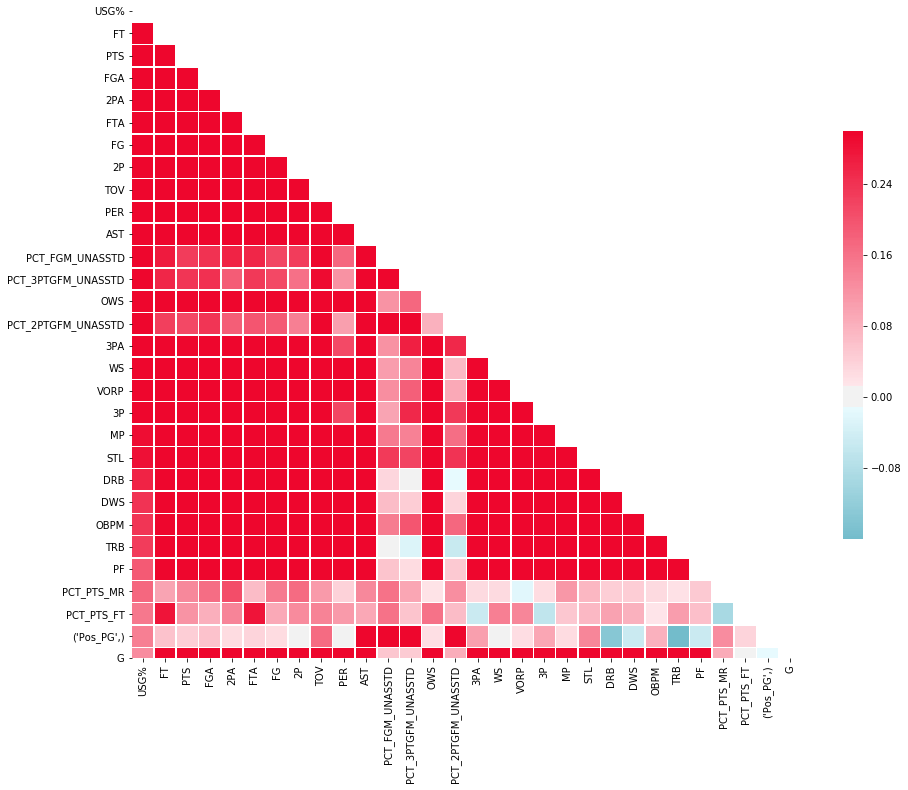

In [14]:
# Correlation Matrix
corrmat = df1.corr()

# use the absolute value of the correlation matrix for sorting!
all_cols = corrmat.sort_values('USG%',ascending=False)['USG%'].index 
cols = all_cols[:30] # positively correlated features

cm = corrmat.loc[cols,cols]

# Generate a mask for the upper triangle
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, 99, as_cmap=True)

plt.figure(figsize=(15,15))
heat = sns.heatmap(cm, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
#sns.set(font_scale=1.3)
fig = heat.get_figure()
#fig.savefig('/home/jovyan/1030/project/data1030-project/figures/abs_corr_coeff.png', dpi=400, bbox_inches='tight')

In [27]:
"""Old Preprocessing Code"""

# stat = stat[['Year', 'Player', 'Pos', 'Age', 'OWS', "2PA", "3PA", "FTA"]]
# stat1 = stat[stat['Year'] > 2013]
# stat.head(5)

# shot = shot[['YEAR', 'PLAYER', "PCT_FGA_2PT", "PCT_FGA_3PT",
#              "PCT_PTS_2PT", "PCT_PTS_MR", "PCT_PTS_3PT", "PCT_PTS_FSTBRK",
#              "PCT_PTS_FT", "PCT_PTS_OFF_TOS", "PCT_PTS_INTHEPT"]]
# shot.head(5)

# shot['YEAR'] = shot['YEAR'].replace('2018-2019', 2019)
# shot['YEAR'] = shot['YEAR'].replace('2017-2018', 2018)
# shot['YEAR'] = shot['YEAR'].replace('2016-2017', 2017)
# shot['YEAR'] = shot['YEAR'].replace('2015-2016', 2016)
# shot['YEAR'] = shot['YEAR'].replace('2014-2015', 2015)
# shot['YEAR'] = shot['YEAR'].replace('2013-2014', 2014)

# stat['2PA'] = mmscaler.fit_transform(pd.DataFrame(stat['2PA']))
# stat['3PA'] = mmscaler.fit_transform(pd.DataFrame(stat['3PA']))
# stat['FTA'] = mmscaler.fit_transform(pd.DataFrame(stat['FTA']))
# shot['PCT_FGA_2PT'] = mmscaler.fit_transform(pd.DataFrame(shot['PCT_FGA_2PT']))
# shot['PCT_FGA_3PT'] = mmscaler.fit_transform(pd.DataFrame(shot['PCT_FGA_3PT']))
# shot['PCT_PTS_2PT'] = mmscaler.fit_transform(pd.DataFrame(shot['PCT_PTS_2PT']))
# shot['PCT_PTS_2PT'] = mmscaler.fit_transform(pd.DataFrame(shot['PCT_PTS_2PT']))
# shot['PCT_PTS_MR'] = mmscaler.fit_transform(pd.DataFrame(shot['PCT_PTS_MR']))
# shot['PCT_PTS_3PT'] = mmscaler.fit_transform(pd.DataFrame(shot['PCT_PTS_3PT']))
# shot['PCT_PTS_FSTBRK'] = mmscaler.fit_transform(pd.DataFrame(shot['PCT_PTS_FSTBRK']))
# shot['PCT_PTS_FT'] = mmscaler.fit_transform(pd.DataFrame(shot['PCT_PTS_FT']))
# shot['PCT_PTS_OFF_TOS'] = mmscaler.fit_transform(pd.DataFrame(shot['PCT_PTS_OFF_TOS']))
# shot['PCT_PTS_INTHEPT'] = mmscaler.fit_transform(pd.DataFrame(shot['PCT_PTS_INTHEPT']))


# merged = stat1.merge(shot, left_on='Player', right_on='PLAYER', how='right')
# merged1 = merged[merged['Year'] == merged['YEAR']]
# merged2 = merged1[['Pos', 'OWS', '2PA', '3PA', 'FTA', "PCT_FGA_2PT", "PCT_FGA_3PT",
#                   "PCT_PTS_2PT", "PCT_PTS_MR", "PCT_PTS_3PT", "PCT_PTS_FSTBRK",
#                   "PCT_PTS_FT", "PCT_PTS_OFF_TOS", "PCT_PTS_INTHEPT"]]
# index = [x for x in range(3553)]

# one_hot_var = ohenc.fit_transform(pd.DataFrame(merged2['Pos']))
# one_hot_var_name = ohenc.get_feature_names(['Pos'])
# one_hot_var = pd.DataFrame(one_hot_var, columns = [one_hot_var_name])

# merged2 = merged2.reset_index()
# df = merged2[['OWS', '2PA', '3PA', 'FTA', "PCT_FGA_2PT", "PCT_FGA_3PT",
#                   "PCT_PTS_2PT", "PCT_PTS_MR", "PCT_PTS_3PT", "PCT_PTS_FSTBRK",
#                   "PCT_PTS_FT", "PCT_PTS_OFF_TOS", "PCT_PTS_INTHEPT"]]

# df1 = pd.concat([df, one_hot_var], axis=1)
# #one_hot_var
# 1df1